# TASK 4.10. - PART 1
## Table of Contents
#### 1. Import libraries and datasets
#### 2. Address security implications of the dataset
#### 3. Regional segmentation for Instacart dataset
#### 4. Exclusion flag for low-activity customers
#### 5. Instacart customer profiling
##### 5.1. Age profile
##### 5.2. Income profile
##### 5.3. Number of dependants profile
##### 5.4. Departments profile
#### 6. Visualizations for the customer profiles
##### 6.1. Age profile chart
##### 6.2. Income profile chart
##### 6.3. Number of dependants profile chart
##### 6.4. Departments profile chart
##### 6.5. Order hours chart
##### 6.6. Busiest days of the week chart
#### 7. Aggregation of the max, mean and min variables on a customer-profile level 
##### 7.1. Usage frequency
#### 7.2. Frequency
#### 8. Comparison of customer profiles with regions and departments
##### 8.1. Age profile and departments
##### 8.2. Income profile and departments
##### 8.3. Number of dependants profile and departments
##### 8.4. Age profile and regions
##### 8.5. Income profile and regions
##### 8.6. Number of dependants and regions
##### 8.7. Departments and regions
#### 9. Visualizations for the comparisons of the customer profiles with regions and departments
##### 9.1. Age profile and departments chart
##### 9.2. Income profile and departments chart
##### 9.3. Number of dependants profile and departments chart
##### 9.4. Age profile and regions chart
##### 9.5. Income profile and regions chart
##### 9.6. Number of dependants profile and regions chart
##### 9.7. Regions and departments chart
##### 9.8 Ordering habits vs. loyalty and region
##### 9.9. Export charts
#### 10. Export final data set

---

## 1. Import libraries and datasets

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [76]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [77]:
# Create path
path = r'/Users/mariliamachado/Documents/CareerFoundry/11-2024 Instacart Basket Analysis'

In [78]:
# Import dataset
ords_prods_customers_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_4_9_task_part_1_revised.pkl'))

## 2. Address security implications of the dataset

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.


In [81]:
ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,surname,gender,state,age,date_joined,number_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,Married,40423,both


In [82]:
ords_prods_customers_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_hour', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'average_price_orders', 'spending_flag', 'median_ordering_behavior',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'number_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

I will drop the first and last name columns, since they contain PII.

In [84]:
#Drop columns containing PII
ords_prods_customers_merge = ords_prods_customers_merge.drop(columns=['first_name', 'surname'])


## 3. Regional segmentation for Instacart dataset

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
- Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [87]:
ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_ordering_behavior,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both


In [88]:
#Create regional segmentation for Northeast
ords_prods_customers_merge.loc[(ords_prods_customers_merge['state'] == 'Maine') |
(ords_prods_customers_merge['state'] == 'New Hampshire') | 
(ords_prods_customers_merge['state'] == 'Vermont') |
(ords_prods_customers_merge['state'] == 'Massachusetts') |
(ords_prods_customers_merge['state'] == 'Rhode Island') |
(ords_prods_customers_merge['state'] == 'Connecticut') |
(ords_prods_customers_merge['state'] == 'New York')   |
(ords_prods_customers_merge['state'] == 'New Jersey') |
(ords_prods_customers_merge['state'] == 'Pennsylvania'), 'region'] = 'Northeast'

In [89]:
#Create regional segmentation for Midwest
ords_prods_customers_merge.loc[(ords_prods_customers_merge['state'] == 'Wisconsin') | 
(ords_prods_customers_merge['state'] == 'Michigan') |
(ords_prods_customers_merge['state'] == 'Illinois') |
(ords_prods_customers_merge['state'] == 'Indiana') |
(ords_prods_customers_merge['state'] == 'Ohio') |
(ords_prods_customers_merge['state'] == 'North Dakota') |
(ords_prods_customers_merge['state'] == 'South Dakota')   |
(ords_prods_customers_merge['state'] == 'Nebraska') | 
(ords_prods_customers_merge['state'] == 'Kansas') |
(ords_prods_customers_merge['state'] == 'Minnesota') |
(ords_prods_customers_merge['state'] == 'Iowa') |
(ords_prods_customers_merge['state'] == 'Missouri'), 'region'] = 'Midwest'

In [90]:
#Create regional segmentation for South
ords_prods_customers_merge.loc[(ords_prods_customers_merge['state'] == 'Delaware') | 
(ords_prods_customers_merge['state'] == 'Maryland') | 
(ords_prods_customers_merge['state'] == 'District of Columbia') |
(ords_prods_customers_merge['state'] == 'Virginia') |
(ords_prods_customers_merge['state'] == 'West Virginia') |
(ords_prods_customers_merge['state'] == 'North Carolina') |
(ords_prods_customers_merge['state'] == 'South Carolina')   |
(ords_prods_customers_merge['state'] == 'Georgia') | 
(ords_prods_customers_merge['state'] == 'Florida') |
(ords_prods_customers_merge['state'] == 'Kentucky') |
(ords_prods_customers_merge['state'] == 'Tennessee') |
(ords_prods_customers_merge['state'] == 'Mississippi') |
(ords_prods_customers_merge['state'] == 'Alabama') |
(ords_prods_customers_merge['state'] == 'Oklahoma') |
(ords_prods_customers_merge['state'] == 'Texas') |
(ords_prods_customers_merge['state'] == 'Arkansas') |
(ords_prods_customers_merge['state'] == 'Louisiana'), 'region'] = 'South'

In [91]:
#Create regional segmentation for West
ords_prods_customers_merge.loc[(ords_prods_customers_merge['state'] == 'Idaho') | 
(ords_prods_customers_merge['state'] == 'Montana') | 
(ords_prods_customers_merge['state'] == 'Wyoming') |
(ords_prods_customers_merge['state'] == 'Nevada') |
(ords_prods_customers_merge['state'] == 'Utah') |
(ords_prods_customers_merge['state'] == 'Colorado') |
(ords_prods_customers_merge['state'] == 'Arizona') |
(ords_prods_customers_merge['state'] == 'New Mexico') |
(ords_prods_customers_merge['state'] == 'Alaska') |
(ords_prods_customers_merge['state'] == 'Washington') |
(ords_prods_customers_merge['state'] == 'Oregon') |
(ords_prods_customers_merge['state'] == 'California') |
(ords_prods_customers_merge['state'] == 'Hawaii'), 'region'] = 'West'


In [92]:
ords_prods_customers_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,Married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,Married,64940,both,West
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,Married,64940,both,West
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,Married,64940,both,West
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,Regular customer,Female,Alaska,68,7/4/2017,3,Married,64940,both,West


In [93]:
#State column check
ords_prods_customers_merge['state'].value_counts(dropna=False)

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [94]:
#Region column check
ords_prods_customers_merge['region'].value_counts(dropna=False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [95]:
#Region column check
ords_prods_customers_merge['region'].shape

(32404859,)

In [96]:
#State column check
ords_prods_customers_merge['state'].shape

(32404859,)

In [97]:
#Cross spending_flag and region columns
spending_habits_difference = pd.crosstab(ords_prods_customers_merge['region'], ords_prods_customers_merge['spending_flag'], dropna = False)

In [98]:
#Check spending habits difference
spending_habits_difference

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


The South has the highest number of high spenders and also of low spenders. However, all regions have a higher number of low spenders than high spenders. After the South, the West has the highest number of high spenders, then the Midwest and in last, the Northeast. The number of low spenders follows the same order. A probable reason for this result is the fact that the South has a higher number of population.

## 4. Exclusion flag for low-activity customers

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [102]:
#Create exclusion flag
ords_prods_customers_merge.loc[ords_prods_customers_merge['max_order'] < 5, 'exclusion_flag'] = 'low-activity customer'
ords_prods_customers_merge.loc[ords_prods_customers_merge['max_order'] >= 5, 'exclusion_flag'] = 'regular/high-activity customer'

In [103]:
ords_prods_customers_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,number_dependants,fam_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Female,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Female,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Female,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Female,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Female,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer


In [104]:
#Count values of new column
ords_prods_customers_merge['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
regular/high-activity customer    30964564
low-activity customer              1440295
Name: count, dtype: int64

In [105]:
#Exclude low-activity customers from data
df_excluded = ords_prods_customers_merge[ords_prods_customers_merge['exclusion_flag'] != 'low-activity customer']

In [106]:
#Check exclusion_flag values in new df
df_excluded['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
regular/high-activity customer    30964564
Name: count, dtype: int64

In [107]:
#Check new df
df_excluded.head(100)
df_excluded.shape

(30964564, 30)

In [108]:
#Export new df
df_excluded.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_excluded_4_10_task_part_1.pkl'))

## 5. Instacart customer profiling

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

### 5.1. Age profile

In [112]:
#Check basic statistics about the age variable
ords_prods_customers_merge['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [113]:
#Create client profile based on age
ords_prods_customers_merge.loc[ords_prods_customers_merge['age'] >= 18 & (ords_prods_customers_merge['age'] <= 39), 'age_profile'] = 'Young Adult'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['age'] <= 59) & (ords_prods_customers_merge['age'] > 39), 'age_profile'] = 'Middle Age Adult'
ords_prods_customers_merge.loc[ords_prods_customers_merge['age'] > 59, 'age_profile'] = 'Senior Adult'


In [114]:
ords_prods_customers_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,state,age,date_joined,number_dependants,fam_status,income,_merge,region,exclusion_flag,age_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Alabama,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,Alaska,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,Alaska,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,Alaska,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,Alaska,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult


In [115]:
#Check values in new column
ords_prods_customers_merge['age_profile'].value_counts(dropna = False)

age_profile
Young Adult         11164192
Senior Adult        11067255
Middle Age Adult    10173412
Name: count, dtype: int64

### 5.2. Income profile

In [117]:
#Check basic statistics about the income variable
ords_prods_customers_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [118]:
#Create client profile based on income
ords_prods_customers_merge.loc[ords_prods_customers_merge['income'] <= 50000, 'income_profile'] = 'Low Income'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['income'] > 50000) & (ords_prods_customers_merge['income'] <= 160000), 'income_profile'] = 'Average Income'
ords_prods_customers_merge.loc[ords_prods_customers_merge['income'] > 160000, 'income_profile'] = 'High Income'

In [119]:
#Check values in new column
ords_prods_customers_merge['income_profile'].value_counts(dropna = False)

income_profile
Average Income    26602123
Low Income         3594083
High Income        2208653
Name: count, dtype: int64

In [120]:
ords_prods_customers_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,age,date_joined,number_dependants,fam_status,income,_merge,region,exclusion_flag,age_profile,income_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,68,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income


### 5.3. Number of dependants profile

In [122]:
ords_prods_customers_merge['number_dependants'].value_counts(dropna = False)

number_dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [123]:
ords_prods_customers_merge['fam_status'].value_counts(dropna = False)

fam_status
Married                             22756753
Single                               5325691
Divorced/widowed                     2771812
Living with parents and siblings     1550603
Name: count, dtype: int64

In [124]:
#Create client profile based on number of dependants
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] == 0) & (ords_prods_customers_merge['fam_status'] == 'Married'), 'dependants_profile'] = 'Married without dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] > 0) & (ords_prods_customers_merge['fam_status'] == 'Married'), 'dependants_profile'] = 'Married with dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] == 0) & (ords_prods_customers_merge['fam_status'] == 'Single'), 'dependants_profile'] = 'Single without dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] > 0) & (ords_prods_customers_merge['fam_status'] == 'Single'), 'dependants_profile'] = 'Single with dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] == 0) & (ords_prods_customers_merge['fam_status'] == 'Divorced/widowed'), 'dependants_profile'] = 'Divorced/widowed without dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] > 0) & (ords_prods_customers_merge['fam_status'] == 'Divorced/widowed'), 'dependants_profile'] = 'Divorced/widowed with dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] == 0) & (ords_prods_customers_merge['fam_status'] == 'Living with parents and siblings'), 'dependants_profile'] = 'Living with parents/siblings without dependants'
ords_prods_customers_merge.loc[(ords_prods_customers_merge['number_dependants'] > 0) & (ords_prods_customers_merge['fam_status'] == 'Living with parents and siblings'), 'dependants_profile'] = 'Living with parents/siblings with dependants'

In [125]:
ords_prods_customers_merge['dependants_profile'].value_counts(dropna = False)

dependants_profile
Married with dependants                         22756753
Single without dependants                        5325691
Divorced/widowed without dependants              2771812
Living with parents/siblings with dependants     1550603
Name: count, dtype: int64

In [126]:
ords_prods_customers_merge.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,number_dependants,fam_status,income,_merge,region,exclusion_flag,age_profile,income_profile,dependants_profile
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2/17/2019,3,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,7/4/2017,3,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants


### 5.4. Departments profile

In [128]:
# Import departments dataset
departments_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [129]:
departments_df.head(100)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [130]:
#Check department_id column
ords_prods_customers_merge['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [131]:
# Rename index column as department_id
departments_df.rename(columns ={'Unnamed: 0' : 'department_id'}, inplace = True)

In [132]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [133]:
#Merge ords_prods_customers_merge dataset with departments dataset
merged_df = ords_prods_customers_merge.merge(departments_df, on = 'department_id', how = 'left', indicator = 'match')

In [134]:
merged_df.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,fam_status,income,_merge,region,exclusion_flag,age_profile,income_profile,dependants_profile,department,match
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,beverages,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,dairy eggs,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,snacks,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,snacks,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Married,40423,both,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,household,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,738281,2,4,2,10,8.0,False,21150,13,0,...,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants,frozen,both
96,1673511,2,5,3,11,8.0,False,47144,1,0,...,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants,dairy eggs,both
97,1673511,2,5,3,11,8.0,False,5322,2,0,...,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants,snacks,both
98,1673511,2,5,3,11,8.0,False,17224,3,0,...,Married,64940,both,West,regular/high-activity customer,Senior Adult,Average Income,Married with dependants,snacks,both


In [135]:
#Check departments column
merged_df['department'].value_counts(dropna = False)

department
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

In [136]:
#Check department_id column
merged_df['department_id'].value_counts(dropna = False)

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

In [137]:
#Drop unnecessary columns 
merged_df = merged_df.drop(columns=['_merge', 'match'])

In [138]:
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_hour,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,date_joined,number_dependants,fam_status,income,region,exclusion_flag,age_profile,income_profile,dependants_profile,department
0,2539329,1,1,2,8,NaN,True,196,1,0,...,2/17/2019,3,Married,40423,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,beverages
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,2/17/2019,3,Married,40423,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,dairy eggs
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,2/17/2019,3,Married,40423,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,2/17/2019,3,Married,40423,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,snacks
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,2/17/2019,3,Married,40423,South,regular/high-activity customer,Young Adult,Low Income,Married with dependants,household


## 6. Visualizations for the customer profiles

6. Create an appropriate visualization to show the distribution of profiles.


### 6.1. Age profile chart

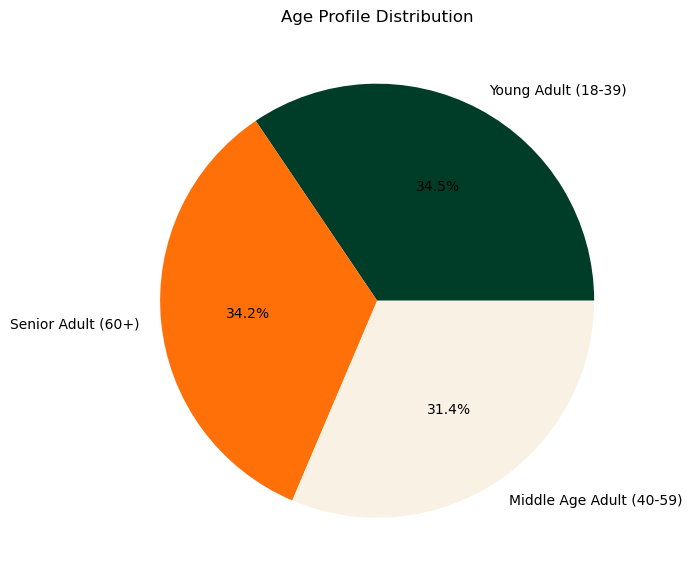

In [325]:
# Create pie chart for the age profile with percentages and the Instacart brand colors
age_profile_counts = merged_df['age_profile'].value_counts()

# Define labels with age ranges
age_labels = ["Young Adult (18-39)", "Senior Adult (60+)", "Middle Age Adult (40-59)"]

# Create the pie chart with updated labels
age_pie_chart = age_profile_counts.plot.pie(
    labels=age_labels,  
    autopct='%1.1f%%', 
    colors=['#003D29', '#FF7009', '#FAF1E5'], 
    figsize=(7, 7)
)
plt.title("Age Profile Distribution")
plt.tight_layout() 
plt.ylabel("") 
plt.show()


### 6.2. Income profile chart

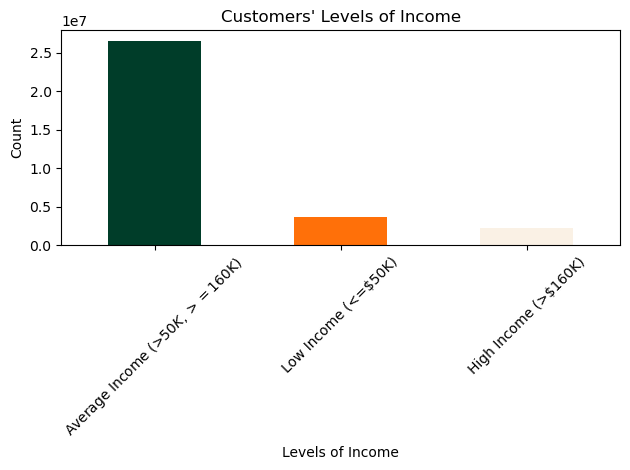

In [352]:
#Create bar chart with customers' levels of income
barchart_income = merged_df['income_profile'].value_counts().plot.bar(
    color=['#003D29', '#FF7009', '#FAF1E5']
)
plt.title("Customers' Levels of Income")
plt.xlabel('Levels of Income')
plt.ylabel('Count')

# Set custom x-axis labels with income ranges
plt.xticks(
    ticks=range(3), 
    labels=[
        "Average Income (>$50K, >=$160K)",
        "Low Income (<=$50K)",
        "High Income (>$160K)"
    ],
    rotation=45 
)
plt.tight_layout() 
plt.show()


### 6.3. Number of dependants profile chart

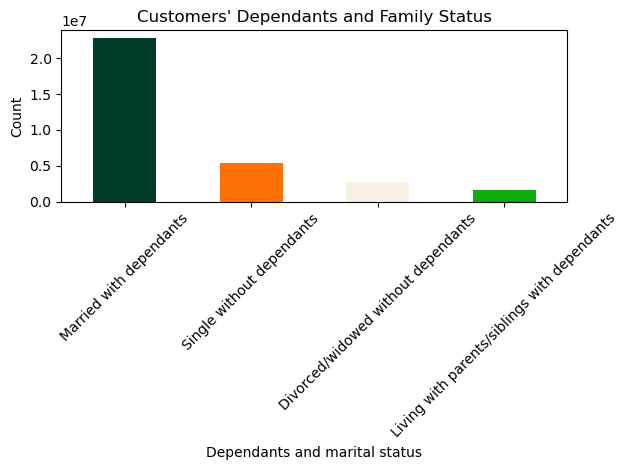

In [146]:
#Create bar chart on dependants profile with Instacart brand colors
barchart_dependants = merged_df['dependants_profile'].value_counts().plot.bar(color = ['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'])
plt.title("Customers' Dependants and Family Status")
barchart_dependants.set_xlabel('Dependants and marital status')  
barchart_dependants.set_ylabel('Count')  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 6.4. Departments profile chart

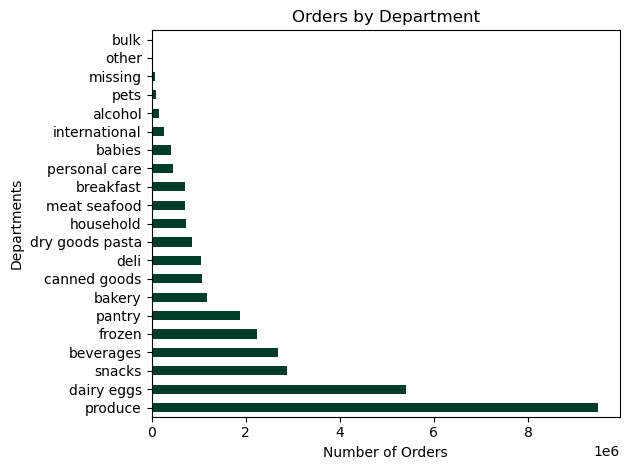

In [302]:
#Create horizontal bar chart of departments with the most orders
barchart_departments = merged_df['department'].value_counts().plot.barh(color=['#003D29'])
plt.title('Orders by Department')
barchart_departments.set_xlabel('Number of Orders')
barchart_departments.set_ylabel('Departments')
plt.tight_layout()
plt.show()


### 6.5. Order hours chart

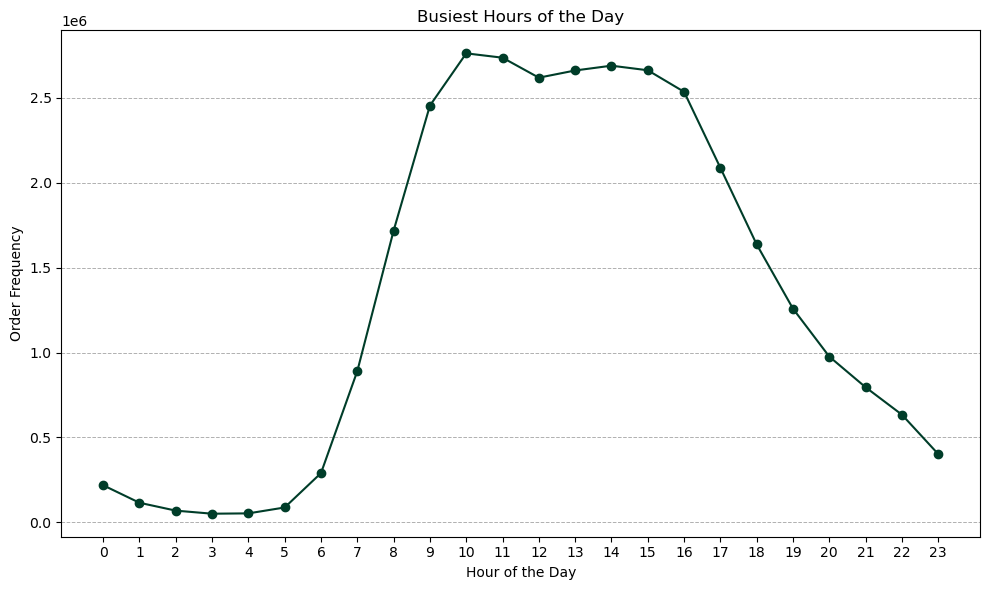

In [286]:
# Create step line chart for order hours
order_hours = merged_df['order_time_hour'].value_counts().sort_index()
order_stepline_chart = order_hours.plot(kind='line', marker='o', color='#003D29', figsize=(10, 6))
plt.title('Busiest Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Order Frequency')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


### 6.6. Busiest days of the week chart

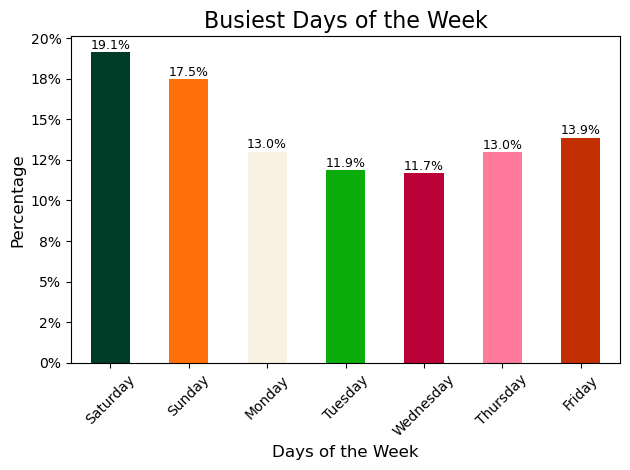

In [300]:
# Create bar chart for the busiest days of the week with percentages and brand colors
day_of_week_ordered = merged_df['orders_day_of_week'].value_counts(normalize=True).sort_index()
barchart_orders_day_of_week = day_of_week_ordered.plot(kind='bar', color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A', '#BA0239', '#FF7A9B', '#C22F00'])
plt.title('Busiest Days of the Week', fontsize=16)
plt.xlabel('Days of the Week', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(range(7), ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"], rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
for i, v in enumerate(day_of_week_ordered):
    plt.text(i, v + 0.002, f"{v:.1%}", ha='center', fontsize=9)
plt.tight_layout()
plt.show()


## 7. Aggregation of the max, mean and min variables on a customer-profile level 

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.


In [155]:
merged_df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_hour', 'days_since_prior_order', 'first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'average_price_orders', 'spending_flag', 'median_ordering_behavior',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_dependants', 'fam_status', 'income', 'region', 'exclusion_flag',
       'age_profile', 'income_profile', 'dependants_profile', 'department'],
      dtype='object')

In [156]:
# Create expenditure aggregation subset of customer profile with the required data
customer_profile = merged_df.groupby(['user_id', 'gender', 'state', 'region', 'number_dependants', 'fam_status', 'age_profile', 'order_number', 'orders_day_of_week', 'order_time_hour', 'loyalty_flag', 'order_frequency_flag', 'dependants_profile', 'income_profile', 'spending_flag'])['prices'].sum().reset_index()

In [157]:
customer_profile.head()

,user_id,gender,state,region,number_dependants,fam_status,age_profile,order_number,orders_day_of_week,order_time_hour,loyalty_flag,order_frequency_flag,dependants_profile,income_profile,spending_flag,prices
0,1,Female,Alabama,South,3,Married,Young Adult,1,2,8,New customer,Non-frequent customer,Married with dependants,Low Income,Low spender,31.6
1,1,Female,Alabama,South,3,Married,Young Adult,2,3,7,New customer,Non-frequent customer,Married with dependants,Low Income,Low spender,35.4
2,1,Female,Alabama,South,3,Married,Young Adult,3,3,12,New customer,Non-frequent customer,Married with dependants,Low Income,Low spender,28.2
3,1,Female,Alabama,South,3,Married,Young Adult,4,4,7,New customer,Non-frequent customer,Married with dependants,Low Income,Low spender,26.0
4,1,Female,Alabama,South,3,Married,Young Adult,5,4,15,New customer,Non-frequent customer,Married with dependants,Low Income,Low spender,57.0


### 7.1. Usage frequency

In [159]:
# Aggregation of the max, mean, and min variables on usage frequency
usage_freq_aggregation = merged_df.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_prior_order': ['max', 'min', 'mean']})

In [160]:
usage_freq_aggregation

order_number                days_since_prior_order                 
                 max min       mean                    max   min       mean
user_id                                                                    
1                 10   1   5.813559                   30.0   0.0  20.259259
2                 14   1   8.035897                   30.0   3.0  15.967033
3                 12   1   6.000000                   21.0   7.0  11.487179
4                  5   1   2.888889                   21.0   0.0  15.357143
5                  4   1   2.486486                   19.0  10.0  14.500000
...              ...  ..        ...                    ...   ...        ...
206205             3   1   1.687500                   30.0  10.0  20.666667
206206            67   1  38.007018                   15.0   0.0   4.042705
206207            16   1   8.116592                   30.0   1.0  14.879397
206208            49   1  25.505170                   20.0   0.0   7.442105
206209            13   1   6.937984                   30.0   3.0  20.275862

[206209 rows x 6 columns]

### 7.2. Expenditure

In [162]:
# Aggregation of the max, mean and min variables on expenditure
customer_aggregation = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [163]:
customer_aggregation

order_number           prices                  
                 max min  mean    max   min        mean
user_id                                                
1                 10   1   5.5   63.1  25.0   37.570000
2                 14   1   7.5  213.1  19.0  104.685714
3                 12   1   6.5  107.2  30.7   60.116667
4                  5   1   3.0   63.4  10.8   29.540000
5                  4   1   2.5  118.4  43.6   85.000000
...              ...  ..   ...    ...   ...         ...
206205             3   1   2.0  149.1  51.6   95.033333
206206            67   1  34.0  157.3   9.6   32.526866
206207            16   1   8.5  200.8  42.8  101.931250
206208            49   1  25.0  238.5  38.7  115.595918
206209            13   1   7.0  131.5  11.1   70.046154

[206208 rows x 6 columns]

## 8. Comparison of customer profiles with regions and departments

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


### 8.1. Age profile and departments

In [167]:
# Create a crosstab between the age profile and department
age_department_crosstab = pd.crosstab(merged_df['department'], merged_df['age_profile'], dropna = False)


In [168]:
age_department_crosstab

age_profile,Middle Age Adult,Senior Adult,Young Adult
department,,,
alcohol,48143,50664,54889
babies,134517,142912,146373
bakery,368188,400020,404220
beverages,850255,923708,914160
breakfast,220894,238897,243242
bulk,10768,11803,12002
canned goods,335082,363738,369238
dairy eggs,1690587,1838082,1870078
deli,329747,359502,362000


### 8.2. Income profile and departments

In [170]:
# Create a crosstab between the income profile and department
income_department_crosstab = pd.crosstab(merged_df['department'], merged_df['income_profile'], dropna = False)
income_department_crosstab

income_profile,Average Income,High Income,Low Income
department,,,
alcohol,117971,15917,19808
babies,364655,28289,30858
bakery,971328,86391,114709
beverages,2101971,180647,405505
breakfast,558182,47483,97368
bulk,27754,1930,4889
canned goods,905050,76356,86652
dairy eggs,4491657,372011,535079
deli,865492,71661,114096


### 8.3. Number of dependants profile and departments

In [172]:
# Create a crosstab between the dependants profile and department
dependants_department_crosstab = pd.crosstab(merged_df['department'], merged_df['dependants_profile'], dropna = False)
dependants_department_crosstab

dependants_profile,Divorced/widowed without dependants,Living with parents/siblings with dependants,Married with dependants,Single without dependants
department,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451
deli,90818,50415,735689,174327


### 8.4. Age profile and regions

In [174]:
# Create a crosstab between the age profile and region
age_region_crosstab = pd.crosstab(merged_df['age_profile'], merged_df['region'], dropna = False)
age_region_crosstab

region,Midwest,Northeast,South,West
age_profile,,,,
Middle Age Adult,2426658,1790279,3330559,2625916
Senior Adult,2569538,1973103,3685583,2839031
Young Adult,2601129,1959354,3775743,2827966


### 8.5. Income profile and regions

In [176]:
# Create a crosstab between the income profile and region
income_region_crosstab = pd.crosstab(merged_df['income_profile'], merged_df['region'], dropna = False)
income_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
Average Income,6241989,4702533,8831491,6826110
High Income,516938,392947,740934,557834
Low Income,838398,627256,1219460,908969


### 8.6. Number of dependants and regions

In [178]:
# Create a crosstab between the dependants profile and region
dependants_region_crosstab = pd.crosstab(merged_df['dependants_profile'], merged_df['region'], dropna = False)
dependants_region_crosstab

region,Midwest,Northeast,South,West
dependants_profile,,,,
Divorced/widowed without dependants,646401,501059,920849,703503
Living with parents/siblings with dependants,366517,268114,529584,386388
Married with dependants,5325608,4036321,7560642,5834182
Single without dependants,1258799,917242,1780810,1368840


### 8.7. Departments and regions

In [180]:
# Create a crosstab between department and region
region_department_crosstab = pd.crosstab(merged_df['department'], merged_df['region'], dropna = False)
region_department_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


Regarding age, senior and young adults seem to have similar orders from each department, while middle age adults have lower numbers, with all age groups overall ordering the most from the produce and dairy eggs departments.  The South has higher sales in all departments, followed by the West, Midwest and Northeast. Most sales come from married clients with dependants across all regions, with the most from the South, then West, Midwest and Northeast. After married with dependants, most sales come from clients who are single without dependants, followed by clients divorced/widowed without dependants and then customers living with family with dependants. Most sales are from clients with average income, then low income and finally high income, with the most being from the South, then West, Midwest and Northeast.
So far, I don't see any surprising numbers, but after I make the visualizations of these tables, I will have better insights.

## 9. Visualizations for the comparisons of the customer profiles with regions and departments

9. Produce suitable charts to illustrate your results and export them in your project folder.


### 9.1. Age profile and departments chart

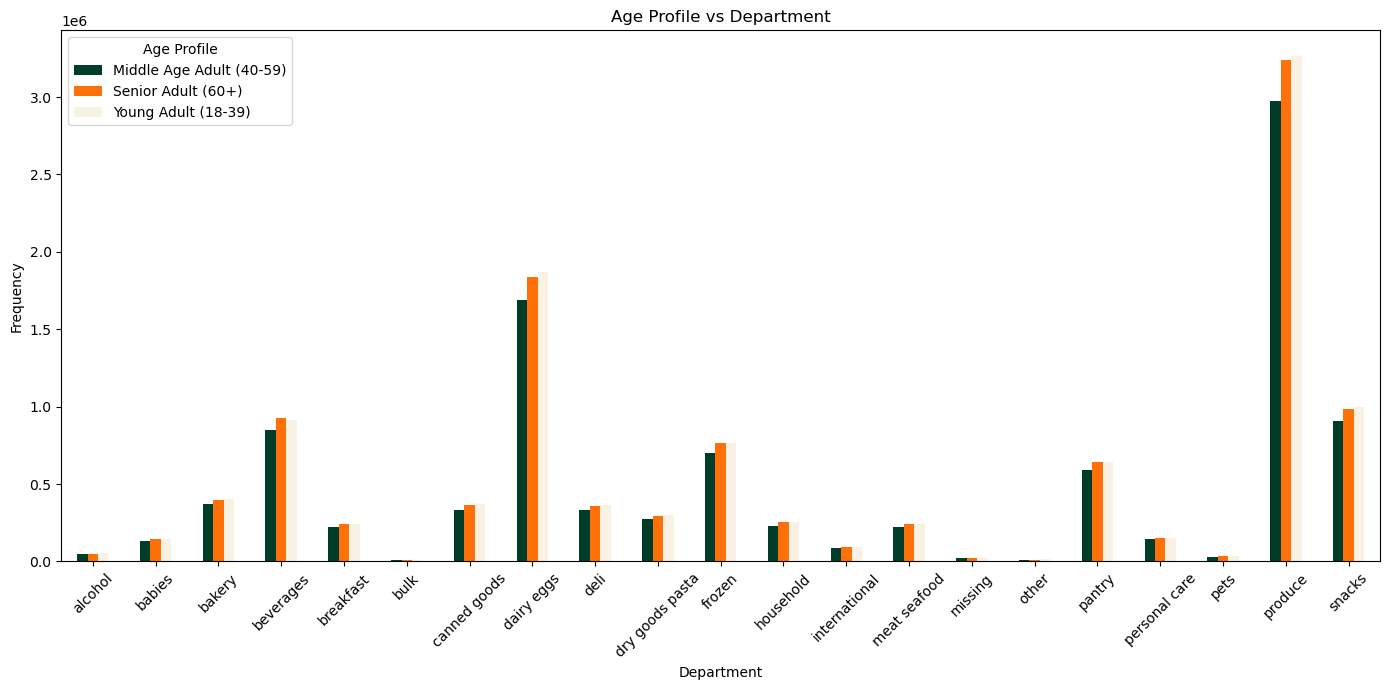

In [185]:
#Create bar chart showing differences in orders from the different age groups in all departments
age_dept_barchart = age_department_crosstab.plot(kind='bar', figsize=(14, 7), color= ['#003D29', '#FF7009', '#FAF1E5'])
plt.title("Age Profile vs Department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Age Profile", labels=["Middle Age Adult (40-59)", "Senior Adult (60+)", "Young Adult (18-39)"])
plt.tight_layout()
plt.show()

### 9.2. Income profile and departments chart

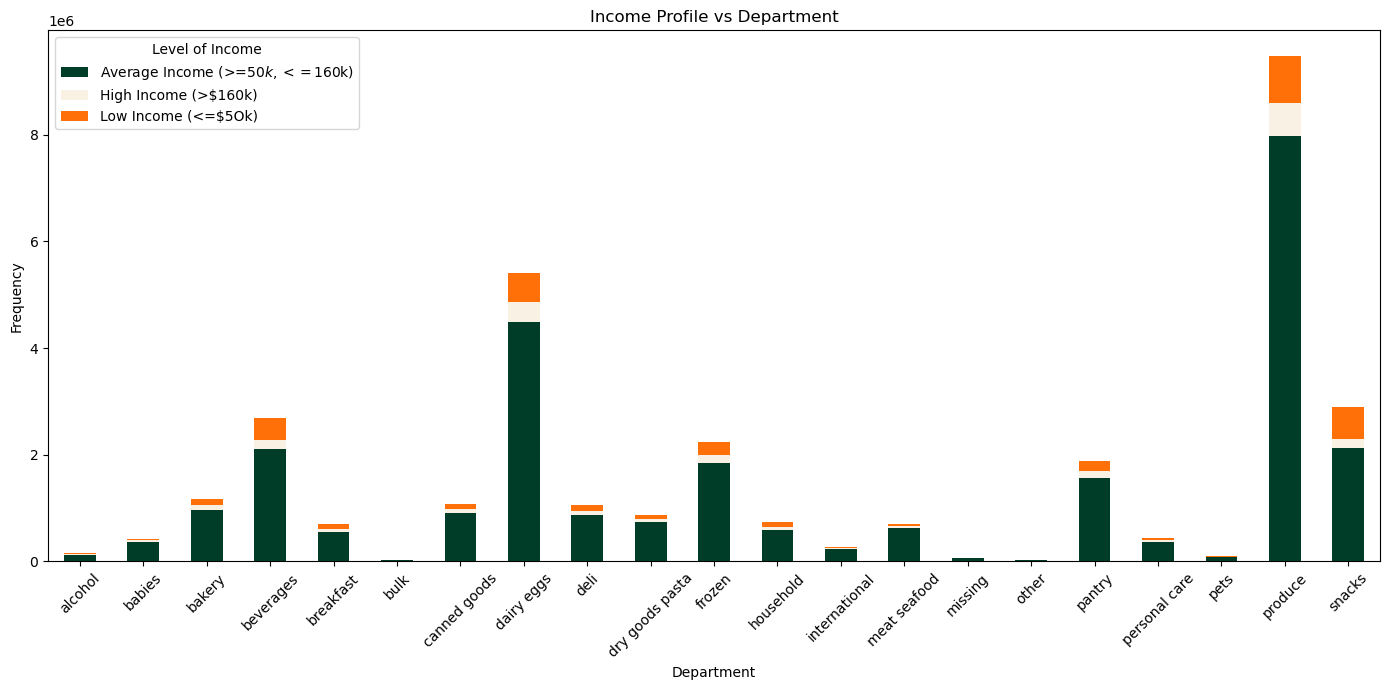

In [187]:
#Create stacked bar chart showing correlation between clients' income and orders from each department
stacked_bar_chart_income_department = income_department_crosstab.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#003D29', '#FAF1E5', '#FF7009'])
plt.title("Income Profile vs Department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.legend(title="Level of Income", labels=["Average Income (>=$50k, <=$160k)", "High Income (>$160k)", "Low Income (<=$5Ok)"])
plt.tight_layout()
plt.show()


### 9.3. Number of dependants profile and departments chart

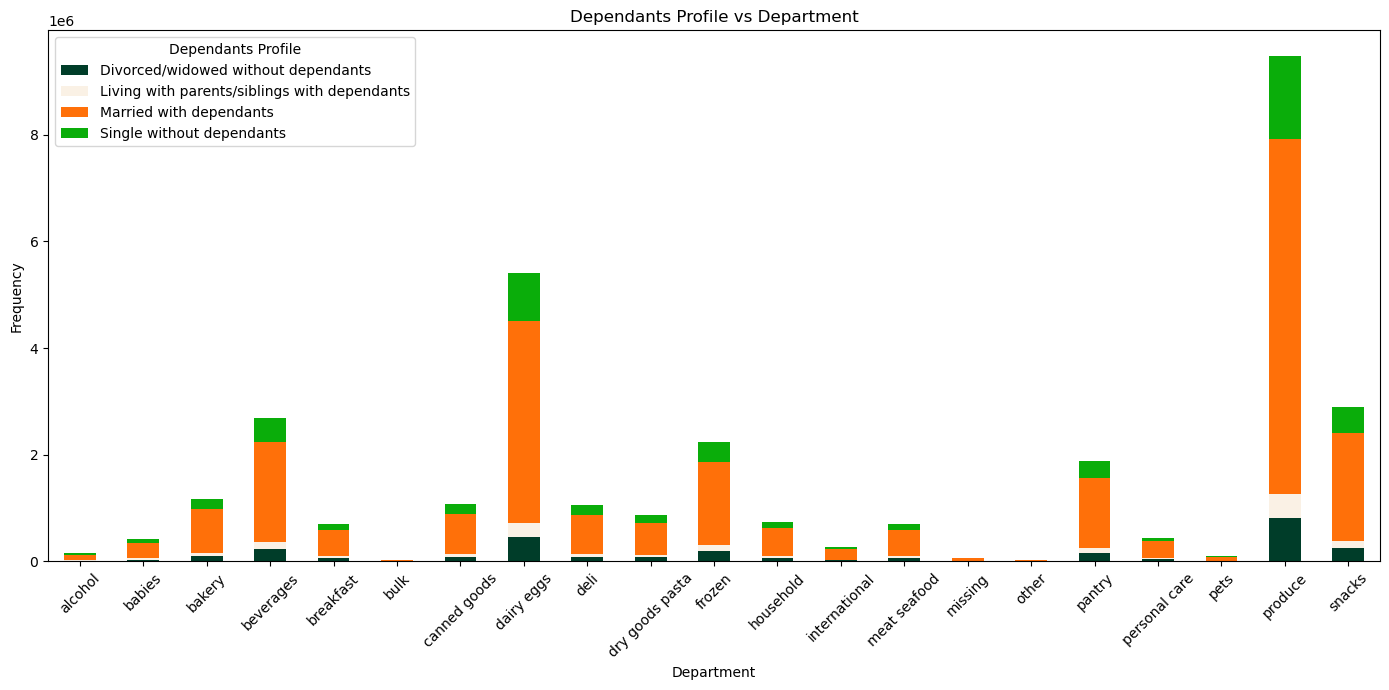

In [189]:
#Create stacked bar chart showing correlation between clients with/without dependants and orders from each department
dependants_dept_chart = dependants_department_crosstab.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#003D29', '#FAF1E5', '#FF7009', '#0AAD0A'])
plt.title("Dependants Profile vs Department")
plt.xlabel("Department")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Dependants Profile")
plt.tight_layout()
plt.show()


### 9.4. Age profile and regions chart

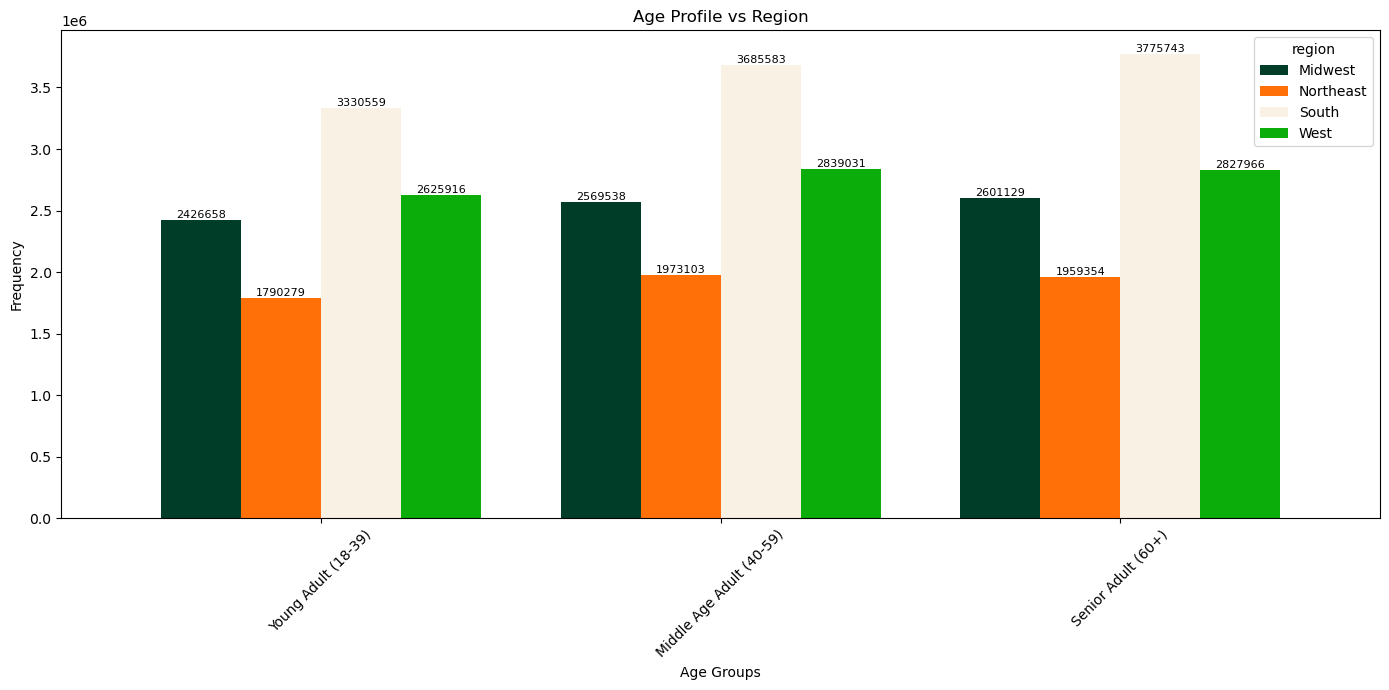

In [191]:
#Create grouped bar chart showing differences in orders in different regions from the different age groups
age_region_grouped_chart = age_region_crosstab.plot(kind='bar', figsize=(14, 7), color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'], width=0.8)
plt.title("Age Profile vs Region")
plt.xlabel("Age Groups")
plt.ylabel("Frequency")
plt.xticks(ticks=range(len(age_region_crosstab)), 
           labels=["Young Adult (18-39)", "Middle Age Adult (40-59)", "Senior Adult (60+)"], 
           rotation=45) 
for bar_group in age_region_grouped_chart.containers:
    age_region_grouped_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')

plt.tight_layout()
plt.show()

### 9.5. Income profile and regions chart

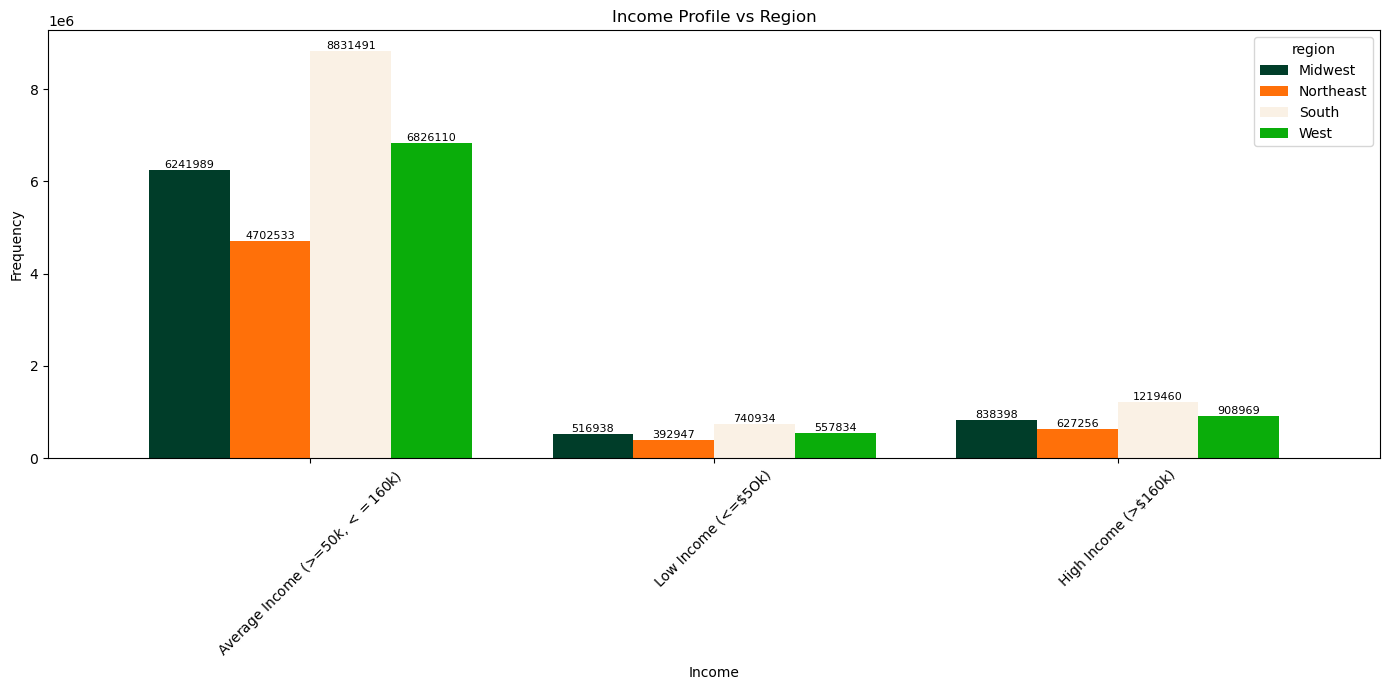

In [354]:
#Create grouped bar chart comparing orders by clients' income in each region
income_region_grouped_chart = income_region_crosstab.plot(kind='bar', figsize=(14, 7), color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'], width=0.8)
plt.title("Income Profile vs Region")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.xticks(ticks=range(len(income_region_crosstab)), 
           labels=["Average Income (>=$50k, <=$160k)", "Low Income (<=$5Ok)", "High Income (>$160k)"], 
           rotation=45) 

for bar_group in income_region_grouped_chart.containers:
    income_region_grouped_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')
plt.tight_layout()
plt.show()



### 9.6. Number of dependants profile and regions chart

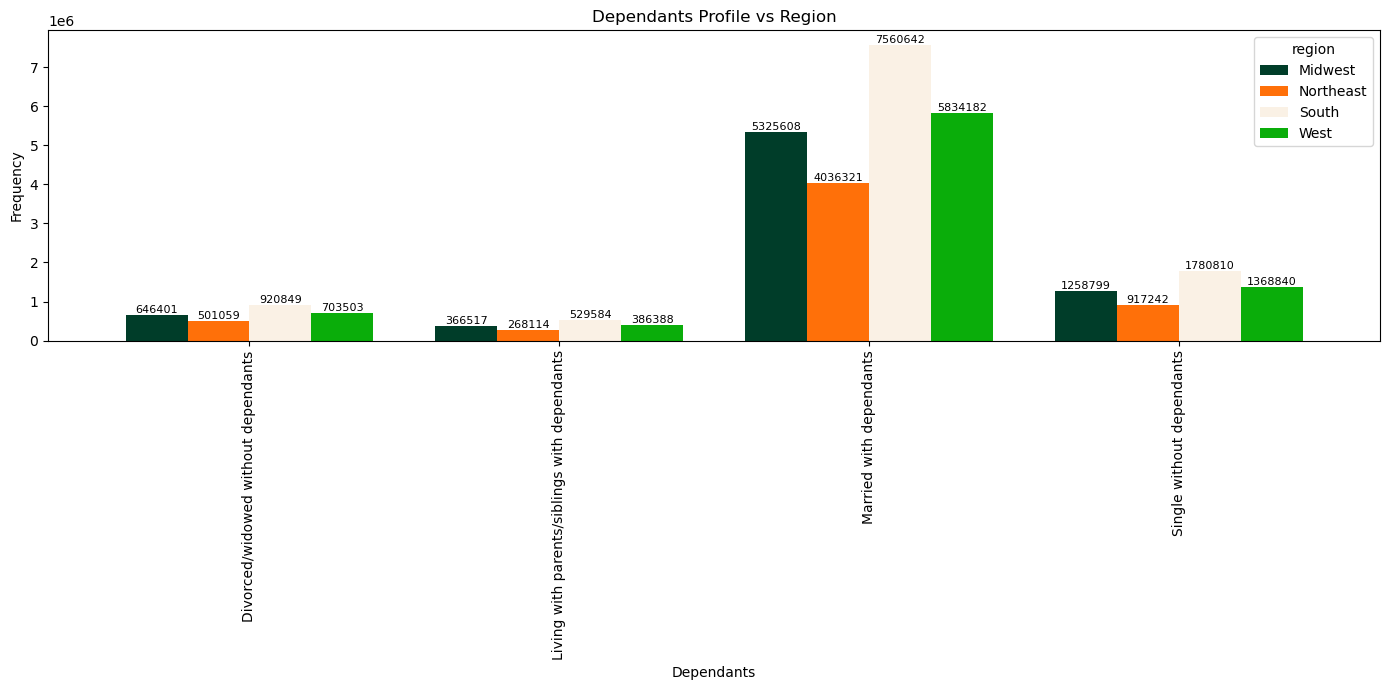

In [195]:
#Create grouped bar chart comparing orders by clients' number of dependants in each region
dependants_region_grouped_chart = dependants_region_crosstab.plot(kind='bar', figsize=(14, 7), color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'], width=0.8)
plt.title("Dependants Profile vs Region")
plt.xlabel("Dependants")
plt.ylabel("Frequency")
for bar_group in dependants_region_grouped_chart.containers:
    dependants_region_grouped_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')
plt.tight_layout()
plt.show()



### 9.7. Regions and departments chart

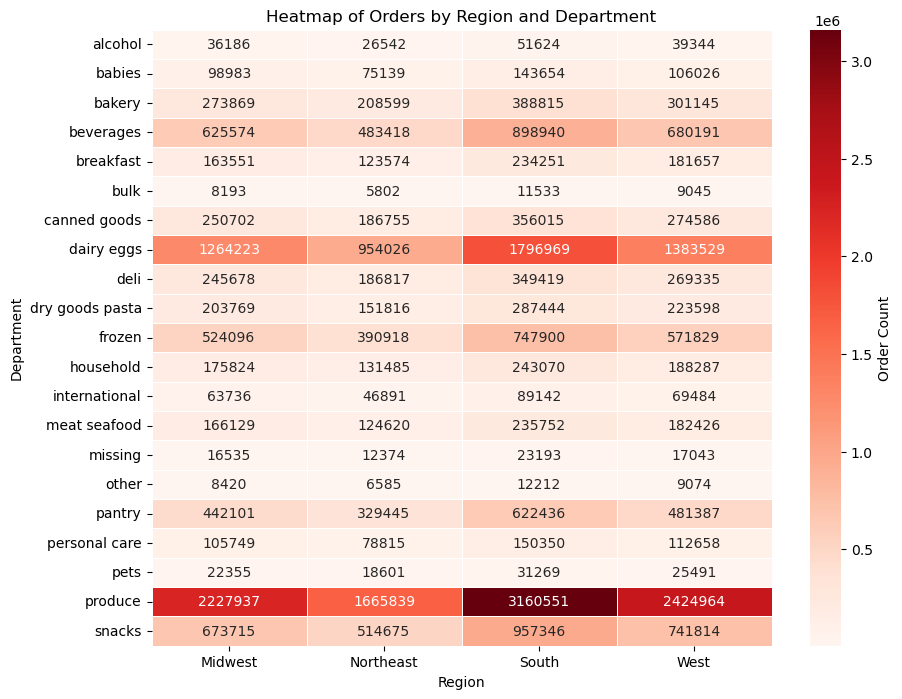

In [197]:
# Create heatmap for orders by region and department
plt.figure(figsize=(10, 8))
regions_departments_heatmap = sns.heatmap(region_department_crosstab, 
            cmap= "Reds",  
            annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Order Count'}, 
            xticklabels=region_department_crosstab.columns, 
            yticklabels=region_department_crosstab.index)
plt.title('Heatmap of Orders by Region and Department')
plt.xlabel('Region')
plt.ylabel('Department')
plt.show()

10. Tidy up your script, export your final data set, and save your notebook.


### 9.8 Ordering habits

I noticed I have information missing to answer the questions in the project brief regarding ordering habits.

In [310]:
#Create crosstab between the loyalty flag and spending_flag
loyalty_spending_crosstab = pd.crosstab(merged_df['loyalty_flag'], merged_df['spending_flag'], dropna = False)


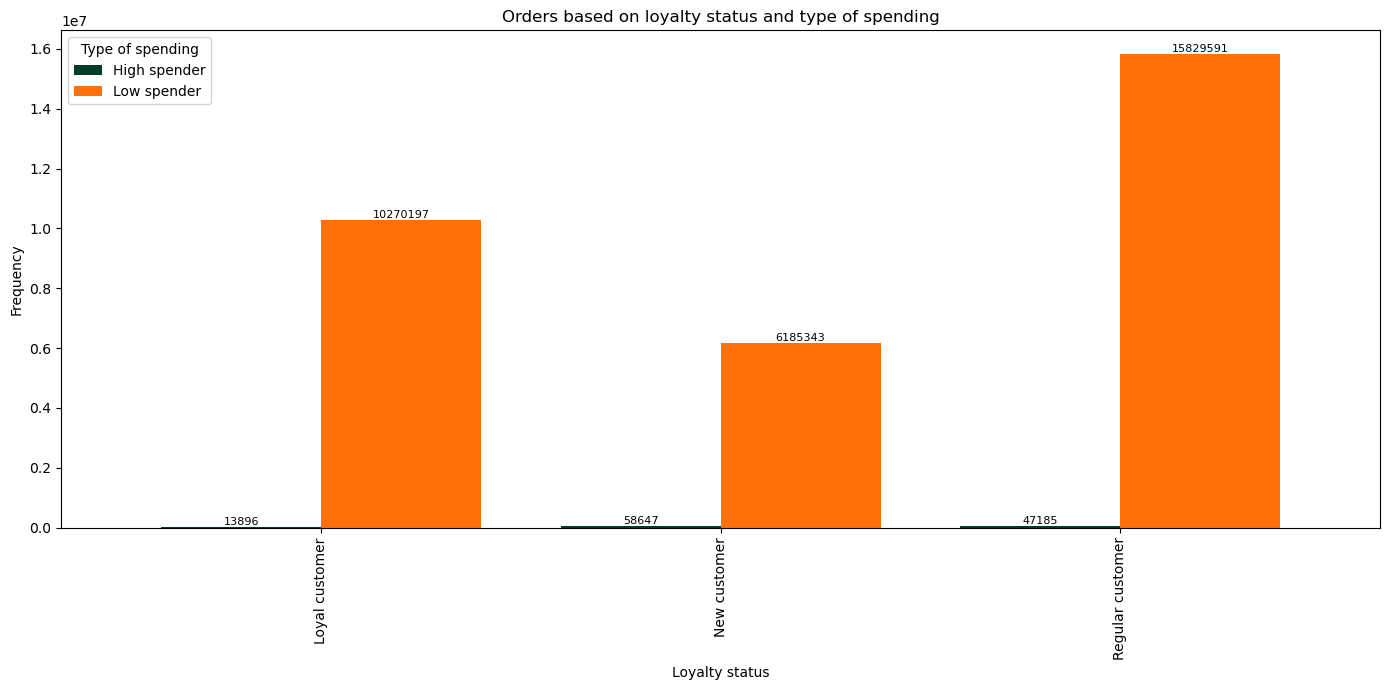

In [344]:
#Create grouped bar chart with crosstab between the loyalty flag and spending_flag
loyalty_spending_grouped_chart = loyalty_spending_crosstab.plot(kind='bar', figsize=(14, 7), color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'], width=0.8)
plt.title("Orders based on loyalty status and type of spending")
plt.xlabel("Loyalty status")
plt.ylabel("Frequency")
plt.legend(title="Type of spending")

for bar_group in loyalty_spending_grouped_chart.containers:
    loyalty_spending_grouped_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')
plt.tight_layout()
plt.show()



In [318]:
#Create crosstab between the loyalty flag and spending_flag
region_spending = pd.crosstab(merged_df['region'], merged_df['spending_flag'], dropna = False)


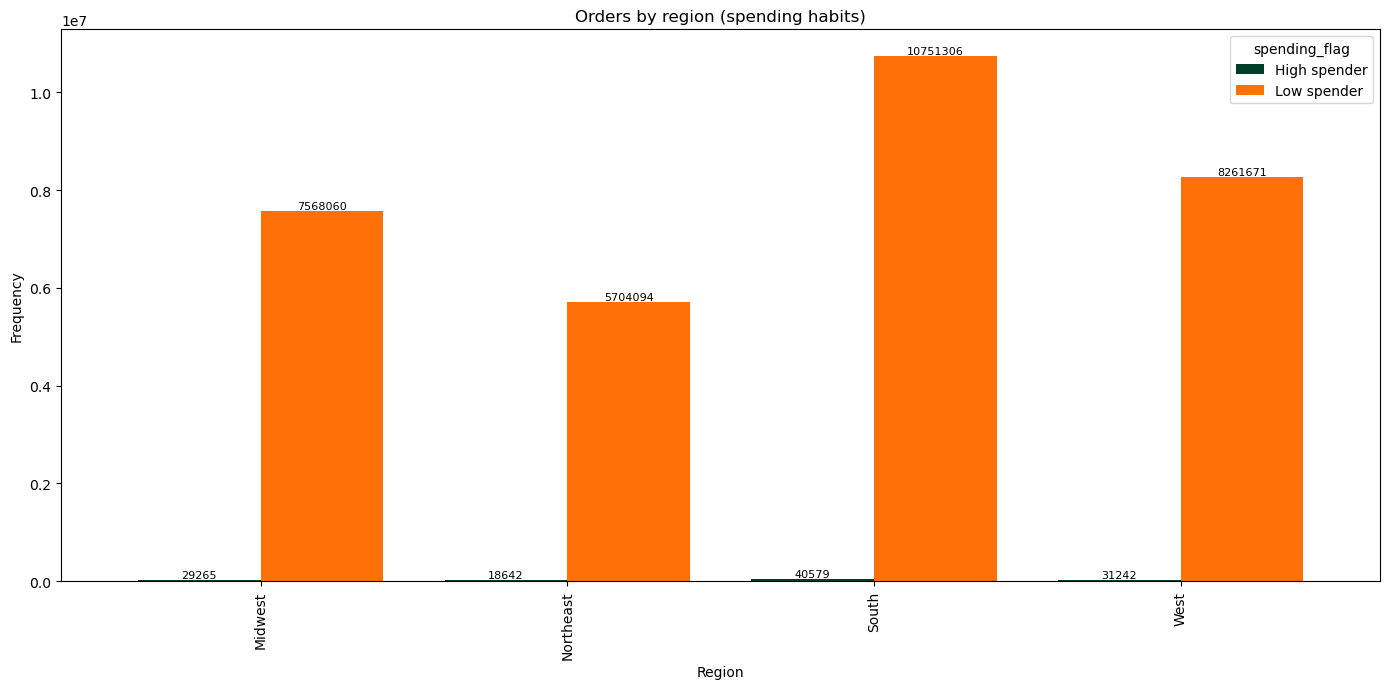

In [342]:
#Create grouped bar chart with crosstab between regions and spending_flag
region_spending_chart = region_spending.plot(kind='bar', figsize=(14, 7), color=['#003D29', '#FF7009', '#FAF1E5', '#0AAD0A'], width=0.8)
plt.title("Orders by region (spending habits)")
plt.xlabel("Region")
plt.ylabel("Frequency")

for bar_group in region_spending_chart.containers:
    region_spending_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')
plt.tight_layout()
plt.show()



In [348]:
#Create crosstab between the region and order_hour
region_dow = pd.crosstab(merged_df['region'], merged_df['orders_day_of_week'], dropna = False)


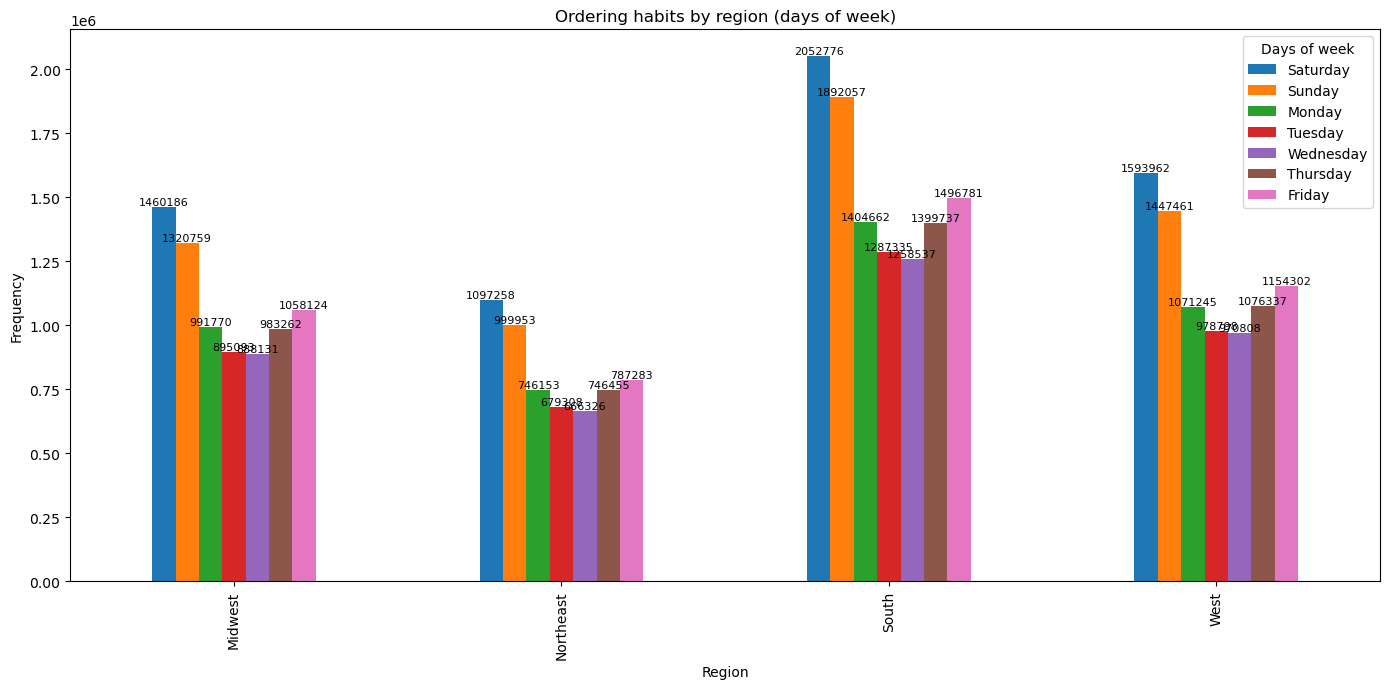

In [340]:
#Create grouped bar chart with crosstab between regions and orders_day_of_week
region_dow_chart = region_dow.plot(kind='bar', figsize=(14, 7))
plt.title("Ordering habits by region (days of week)")
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.legend(title="Days of week", labels=["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
for bar_group in region_dow_chart.containers:
    region_dow_chart.bar_label(bar_group, fmt='%d', fontsize=8, color='black')
plt.tight_layout()
plt.show()


### 9.9. Export charts

In [358]:
#Export customer profiles, busiest days of the week and hours of th day charts
age_pie_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_pie_chart.png'))
barchart_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_income.png'))
barchart_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_dependants.png'))
barchart_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_departments.png'))
order_stepline_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_stepline_chart.png'))
barchart_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_orders_day_of_week.png'))

In [356]:
#Export crosstab charts
region_dow_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_dow_chart.png'))
age_dept_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_dept_barchart.png'))
age_region_grouped_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region_grouped_chart.png'))
dependants_dept_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_dept_chart.png'))
stacked_bar_chart_income_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_chart_income_department.png'))
income_region_grouped_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region_grouped_chart.png'))
dependants_region_grouped_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependants_region_grouped_chart.png'))
regions_departments_heatmap.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regions_departments_heatmap.png'))
region_spending_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending_chart.png'))
loyalty_spending_grouped_chart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending_grouped_chart.png'))

## 10. Export final data set

10. Tidy up your script, export your final data set, and save your notebook.

In [203]:
#Export new merged df
merged_df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_df_4.10.pkl'))